Task 1: Exploring and Visualizing a Simple Dataset
Objective:
Understand how to read, summarize, and visualize a dataset.
Dataset:
Iris Dataset (CSV format, available through seaborn or other open sources)
Instructions:
● Load the dataset using the pandas library.
● Display dataset structure using .shape, .columns, and .head().
● Create basic visualizations:
○ Scatter plot to analyze relationships between variables.
○ Histogram to examine data distribution.
○ Box plot to detect outliers and spread of values.

● Use matplotlib and seaborn for visualizations.

Skills:
● Data loading and inspection using pandas
● Basic data summarization
● Visualization using matplotlib and seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
# Display dataset shape (number of rows and columns)
print("Dataset shape:", iris_df.shape)

# Display column names
print("\nColumn names:", iris_df.columns.tolist())

# Display first 5 rows
print("\nFirst 5 rows:")
print(iris_df.head())

Dataset shape: (150, 5)

Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


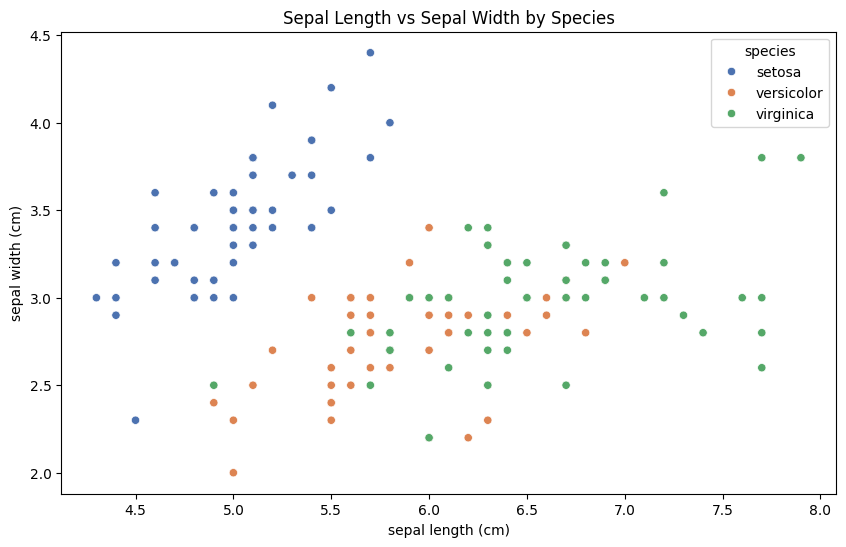

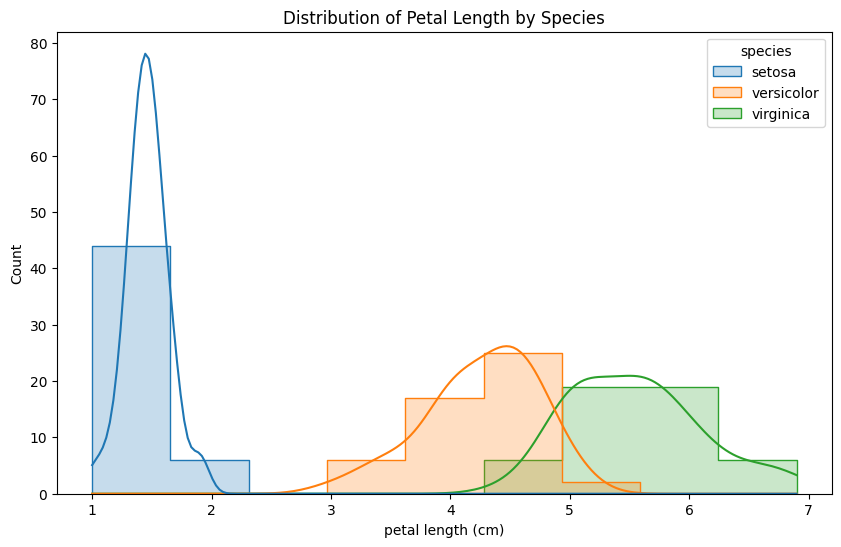

In [7]:
# Scatter plot of sepal length vs sepal width, colored by species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()
# Histogram of petal length distribution by species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='petal length (cm)', hue='species', element='step', kde=True)
plt.title('Distribution of Petal Length by Species')
plt.show()

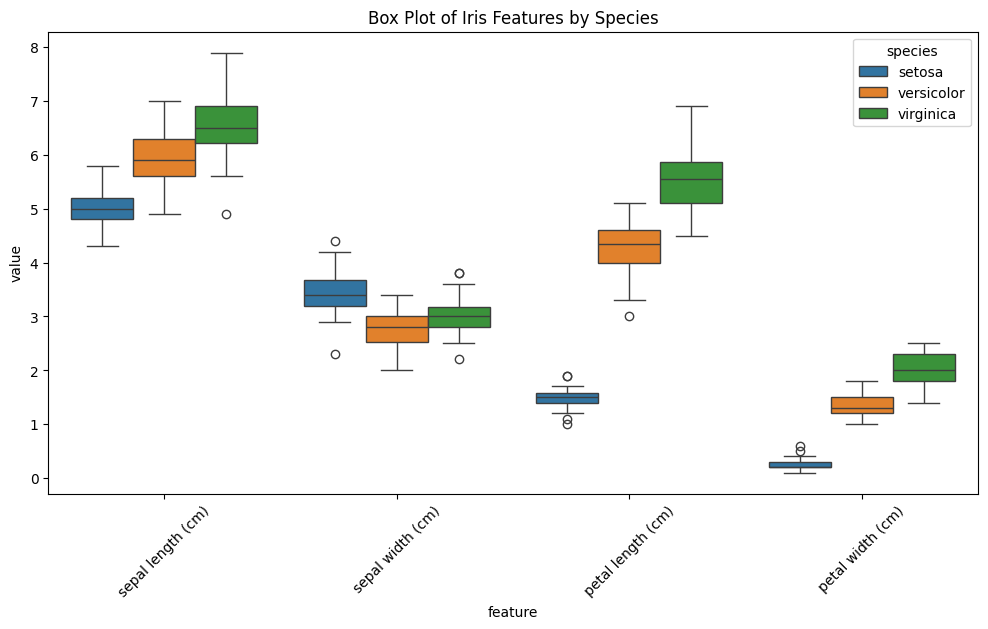

In [8]:
# Box plot of all numerical features
plt.figure(figsize=(12, 6))
iris_melted = iris_df.melt(id_vars='species', var_name='feature', value_name='value')
sns.boxplot(data=iris_melted, x='feature', y='value', hue='species')
plt.title('Box Plot of Iris Features by Species')
plt.xticks(rotation=45)
plt.show()

Task 3: Customer Churn Prediction (Bank Customers)
Objective:
Identify customers who are likely to leave the bank.
Dataset:
Churn Modelling Dataset
Instructions:
● Clean and prepare the dataset.
● Encode categorical features such as geography and gender.
● Train a classification model.
● Analyze feature importance to understand what influences churn.

Skills:
● Categorical data encoding (Label Encoding / One-Hot Encoding)
● Supervised classification modeling
● Understanding and interpreting feature importance

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

In [10]:
# Load the dataset (assuming it's named 'Churn_Modelling.csv')
df = pd.read_csv('Churn_Modelling.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (10000, 14)

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0           

In [11]:
# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Check for missing values (if any)
print("Missing values after dropping columns:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

Missing values after dropping columns:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of duplicates: 0


In [12]:
# Label Encoding for binary categorical feature (Gender)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for multi-categorical feature (Geography)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Verify the encoding
print("\nData after encoding:")
print(df.head())


Data after encoding:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True  


In [13]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nClass distribution in y_train:", y_train.value_counts(normalize=True))
print("Class distribution in y_test:", y_test.value_counts(normalize=True))


Class distribution in y_train: Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64
Class distribution in y_test: Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


In [14]:
# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Confusion Matrix:
[[1538   55]
 [ 222  185]]

Accuracy: 0.8615


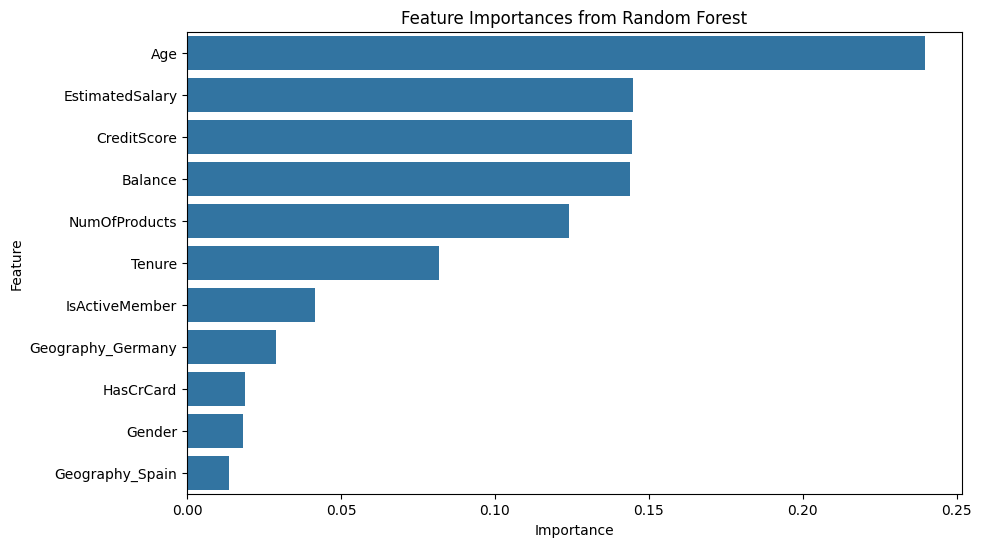

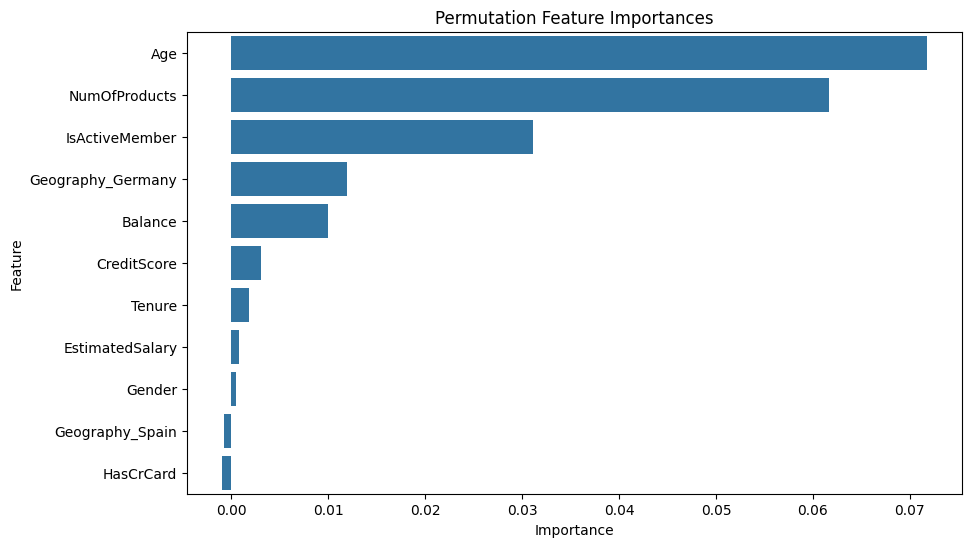

In [15]:
# Get feature importances from the model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

# Permutation importance for more reliable results
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance)
plt.title('Permutation Feature Importances')
plt.show()

Task 5: Personal Loan Acceptance Prediction
Objective:
Predict which customers are likely to accept a personal loan offer.
Dataset:
Bank Marketing Dataset (UCI Machine Learning Repository)
Instructions:
● Perform basic data exploration on features such as age, job, and marital status.
● Train a Logistic Regression or Decision Tree classifier.
● Analyze the results to identify which customer groups are more likely to accept the offer.

Skills:
● Data exploration and visualization
● Classification modeling
● Business insight extraction from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
                age       balance           day      duration      campaign  \
count  11162.00

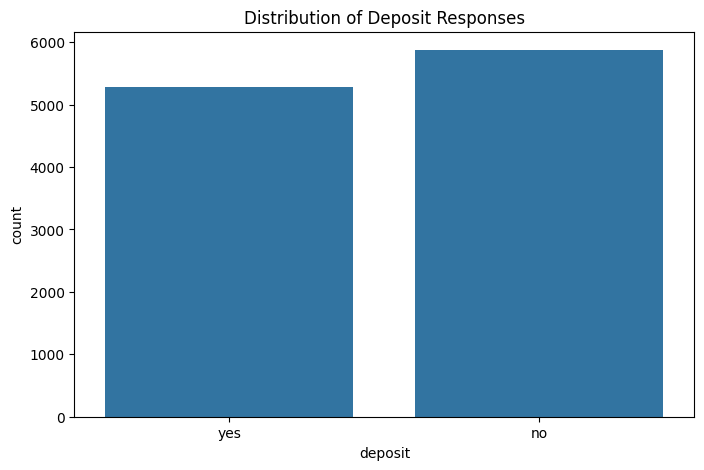

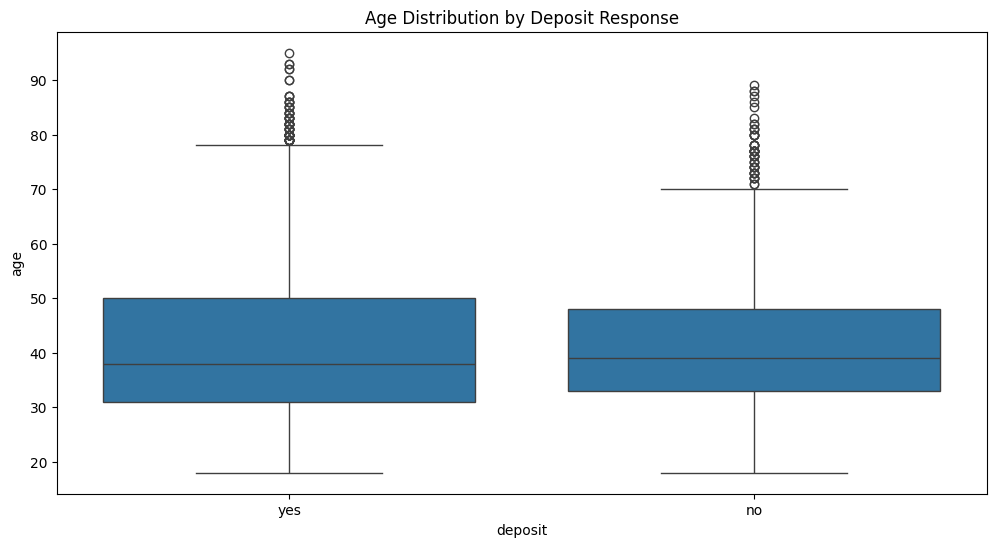

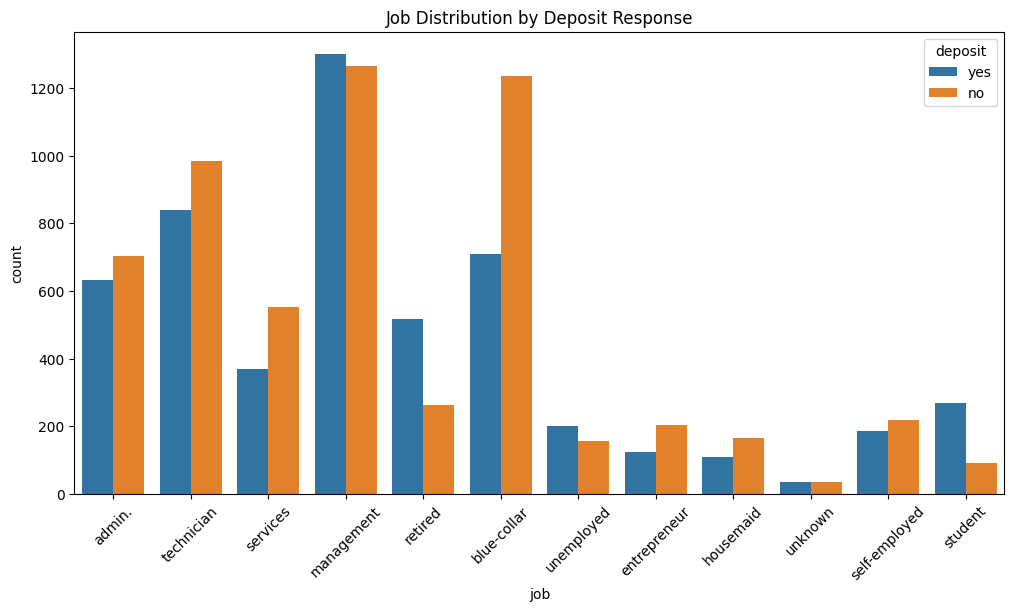

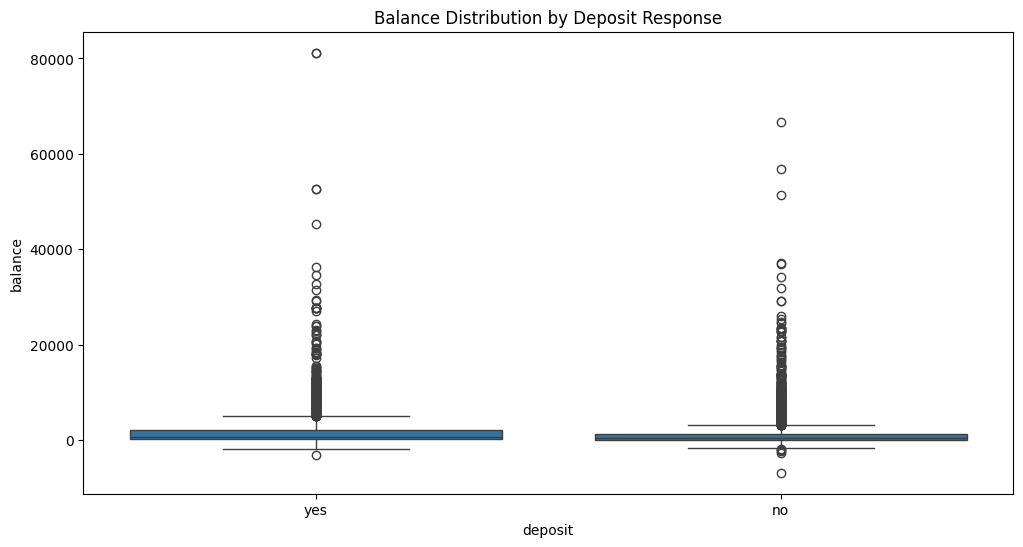

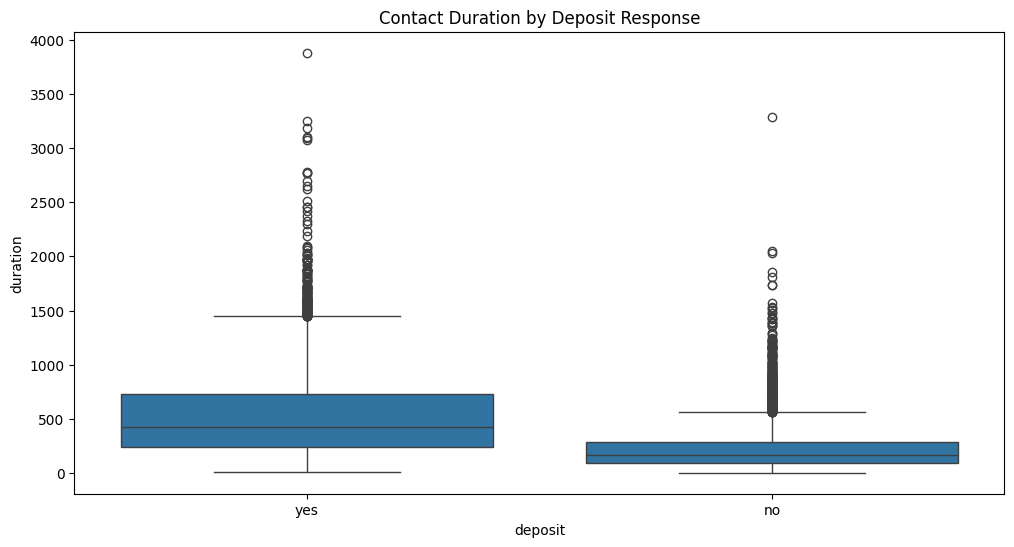

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('bank.csv')

# Basic info
print(df.info())
print(df.describe())

# Distribution of deposits (target variable)
plt.figure(figsize=(8,5))
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit Responses')
plt.show()

# Age distribution by deposit response
plt.figure(figsize=(12,6))
sns.boxplot(x='deposit', y='age', data=df)
plt.title('Age Distribution by Deposit Response')
plt.show()

# Job distribution by deposit response
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution by Deposit Response')
plt.show()

# Balance distribution by deposit response
plt.figure(figsize=(12,6))
sns.boxplot(x='deposit', y='balance', data=df)
plt.title('Balance Distribution by Deposit Response')
plt.show()

# Duration vs deposit response
plt.figure(figsize=(12,6))
sns.boxplot(x='deposit', y='duration', data=df)
plt.title('Contact Duration by Deposit Response')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert target variable
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Split into features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.7891908032248433

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1742
           1       0.79      0.76      0.78      1607

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349


Confusion Matrix:
[[1415  327]
 [ 379 1228]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred = dtree.predict(X_test)

# Evaluation
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(dtree.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Decision Tree Results:
Accuracy: 0.8044192296207823

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1742
           1       0.79      0.81      0.80      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349


Confusion Matrix:
[[1397  345]
 [ 310 1297]]

Feature Importances:
           importance
duration     0.588089
pdays        0.124447
contact      0.105522
month        0.068878
housing      0.068269
poutcome     0.033002
age          0.003104
balance      0.002606
campaign     0.002371
day          0.002136
loan         0.001577
education    0.000000
default      0.000000
job          0.000000
marital      0.000000
previous     0.000000
